In [1]:
import os
from datetime import datetime, time, date
from filemanager import file_ext_search as fes
from dataclasses import dataclass, field
from collections import defaultdict, namedtuple

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
am = datetime.fromtimestamp(1631878760.986)
print(am)

2021-09-17 13:39:20.986000


In [3]:
filepath = r'D:\InspectingP70Data\P70_data\SEB\PS3SLF_2021-09-17T110351Z_00047728.asd.acf'
filepath_idx = r'D:\InspectingP70Data\P70_data\SEB\PS3SLF_2021-09-17T110351Z_00047728.asd.acf.idx'

@dataclass
class IDXFile():
    name: str
    start_byte: int
    end_byte: int
    size: int

def read_idx_file(path):
    idx_files = []
    with open(path, 'r') as f1:
        f1_content = f1.read().splitlines()
        for line in f1_content:
            lc = line.split()
            
            name =  lc[2]
            start_byte = int(lc[0])
            size = int(lc[1])
            end_byte = start_byte + size - 1
            
            idx_files.append(IDXFile(name=name, start_byte=start_byte, end_byte=end_byte, size=size))
            
    return idx_files


In [4]:
idx_files = read_idx_file(filepath_idx)

In [5]:
@dataclass
class XMLHeader:
    name: str
    start_byte: int
    end_byte: int
    root: int
    
class ASDFile:
    pass

with open(filepath, 'rb') as f2:
    buffer = f2.read()
    xml_size = None
    loop = True
    
    start = 0
    
    # Decode XML part
    while loop:
        try:
            buffer[start:start+1].decode(encoding='utf-8', errors='strict')
        except:
            loop = False
        else:
            start += 1  

import xml.etree.ElementTree as ET
am = buffer[0:start].decode(encoding='utf-8', errors='strict')
root2 = ET.fromstring(am)
root2.tag
root2.attrib
root2[1][2][2]
float(root2[1][2][3].text)

0.3461635

In [6]:
print(am)

<?xml version ="1.0" encoding="UTF-8" ?>
<!-- created by ATLAS PARASOUND DS-3/P70 -->
<soundings xmlns="asd_xml_schema_vers2_10" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="asd_xml_schema_vers2_10 asd_xml_schema.xsd" title="ATLAS Sounding Data" system="ATLAS PARASOUND DS-3/P70" systemId="PS3" cmVersion="3.3.4.21" spmVersion="2019-03-22/10:20  76.80.423  V1.8 " tbfVersion="JS:V002.039" spmFPGAVersion="10121800" DM80Version="4.20" docDaytime="2021-09-17T11:03:51Z" noOfSoundings="4" reducedASD="false">
	<installation calibrDate="2021-04-21T07:56:35" sysZOffset="0" xOffset="5.86" yOffset="0.57" zOffset="5.76" yawOffset="0" pitchOffset="0" rollOffset="0" tx_xOffset="5.86" tx_yOffset="0.57" tx_zOffset="5.76" tx_yawOffset="0" tx_pitchOffset="0" tx_rollOffset="0"/>
	<auxData baseTimeTag="1631876630.058">
		<motionData name="OCTANS III" xOffset="0.000" yOffset="0.000" zOffset="0.000" yawOffset="0.00000000" appliedLatency="0.000" status="0" pitchOffset="0.00000000" 

In [7]:

def _util_gen_elements(fields, names):
    results = []
    name_index = 0
    for field in fields:
        part_a, part_b, *_ = field
        if part_a is None:
            results.append(tuple([None, part_b]))
        else:
            results.append(tuple([names[name_index], part_a]))
            name_index += 1
    return results

_ElementTypes = namedtuple(
    "_ElementTypes",
    [
        # These are the canonical names of low-level element types:
        "c8",
        "i8",
        "u8",  # 3 int types of 1 byte
        "i16",
        "u16",  # 2 int types of 2 bytes
        "i32",
        "u32",  # 2 int types of 4 bytes
        "i64",
        "u64",  # 2 int types of 8 bytes
        "f32",  # 1 float type of 4 bytes
        "f64",  # 1 float type of 4 bytes
    ],
)
elemT = _ElementTypes(**dict(zip(_ElementTypes._fields, _ElementTypes._fields)))

def elemD_(name: str, fmt: str, count=1):
    return (name, (fmt, count))

map_size_to_fmt = dict(
    (
        (elemT.c8, ("c", "B", 1)),
        (elemT.i8, ("b", "b", 1)),
        (elemT.u8, ("B", "u1", 1)),
        (elemT.i16, ("h", "i2", 2)),
        (elemT.u16, ("H", "u2", 2)),
        (elemT.i32, ("i", "i4", 4)),
        (elemT.u32, ("I", "u4", 4)),
        (elemT.i64, ("q", "i8", 8)),
        (elemT.u64, ("Q", "u8", 8)),
        (elemT.f32, ("f", "f4", 4)),
        (elemT.f64, ("d", "f8", 8)),
    )
)

# _byte_order_fmt = "<" # Little Endian
_byte_order_fmt = ">" # Big Endian

class ASDXMLHeader:
    
    def __init__(self):
        pass

class ASDDataBlock:
    
    def __init__(self):
        pass

In [54]:
map_size_to_fmt

{'c8': ('c', 'B', 1),
 'i8': ('b', 'b', 1),
 'u8': ('B', 'u1', 1),
 'i16': ('h', 'i2', 2),
 'u16': ('H', 'u2', 2),
 'i32': ('i', 'i4', 4),
 'u32': ('I', 'u4', 4),
 'i64': ('q', 'i8', 8),
 'u64': ('Q', 'u8', 8),
 'f32': ('f', 'f4', 4),
 'f64': ('d', 'f8', 8)}

{'c8': 'c8',
 'i8': 'i8',
 'u8': 'u8',
 'i16': 'i16',
 'u16': 'u16',
 'i32': 'i32',
 'u32': 'u32',
 'i64': 'i64',
 'u64': 'u64',
 'f32': 'f32',
 'f64': 'f64'}

In [8]:
import struct
# Decode Binary Header part
# 32 Bytes

# 0 ... 3: Binary Header Separator
bin_sep = struct.Struct('>4s')
bin_separator = bin_sep.unpack(buffer[start:start+bin_sep.size])
start_next = start + bin_sep.size
print(bin_separator)

# 4 ... 5 Header Length (32 Byte)
head_len = struct.Struct('>2b')
head_length = head_len.unpack(buffer[start_next:start_next+head_len.size])
start_next = start_next + head_len.size
print(head_length)

# 6 ... 7 Byter Per Sample
b_per_sample = struct.Struct('>h')
bytes_per_sample = head_len.unpack(buffer[start_next:start_next+b_per_sample.size])
start_next = start_next + b_per_sample.size
print(bytes_per_sample)

# 8 ... 11 Number of Samples (h=0..F)
num_sample = struct.Struct('>I')
number_samples = num_sample.unpack(buffer[start_next:start_next+num_sample.size])
# number_of_samples = int.from_bytes(number_samples[0], byteorder='big')
start_next = start_next + num_sample.size
print(number_samples)

# 12 ... 15 Header Version (0100 for Version 1.0)
h_ver = struct.Struct('>4s')
header_version = h_ver.unpack(buffer[start_next:start_next+h_ver.size])
start_next = start_next + h_ver.size
print(header_version)

# 16 ... 19 Data Type, e.g. _PAR/_PLF etc (_ is a space; 0x20)
d_type = struct.Struct('>4s')
data_type = d_type.unpack(buffer[start_next:start_next+d_type.size])
start_next = start_next + d_type.size
print(data_type)

# 20 ... 27 Ident Number (resp. # see below)
ident_num = struct.Struct('>8s')
ident_number = ident_num.unpack(buffer[start_next:start_next+ident_num.size])
start_next = start_next + ident_num.size
print(ident_number)

# 28 ... 29 Subsident Number (vers. 1.1)
subsid_num = struct.Struct('>H')
subsident_num = subsid_num.unpack(buffer[start_next:start_next+subsid_num.size])
start_next = start_next + subsid_num.size
print(subsident_num)
# 30 ... 31 Flags 0..15; 0 - Complex Sample, 1 - Polar Coordinates, 2..15 - Reserve
# 0000 - real nums, 0001 - complex numbers with real and imaginary part
fl = struct.Struct('>H')
flags = fl.unpack(buffer[start_next:start_next+fl.size])
start_next = start_next + fl.size
print(flags)


(b'\xff\xff\xff\xff',)
(0, 32)
(0, 8)
(1956,)
(b'0101',)
(b' SLF',)
(b'00477280',)
(0,)
(1,)


In [61]:
start_next2 = start_next
noScans=1956 
startTimeRel2TRG=0.014090 
scanInterval=8.192021e-005

real = []
imag = []
complex = []
times = []
# Data. Each sample - 8 bytes
samp = struct.Struct('>2l')

for i in range(noScans):
    sample = samp.unpack(buffer[start_next2:start_next2+samp.size])
    start_next2 = start_next2 + samp.size
    real.append(sample[1])
    imag.append(sample[0])
    # complex.append(sample[0])
    
    
    sample_time = scanInterval*i
        
    times.append(sample_time)




In [40]:
len(real)

1956

In [74]:
complex = (np.array(real) + np.array(imag)).T

In [70]:
times2 = np.array(times)*-1

In [71]:
times2

array([-0.00000000e+00, -8.19202100e-05, -1.63840420e-04, ...,
       -1.59990170e-01, -1.60072090e-01, -1.60154011e-01])

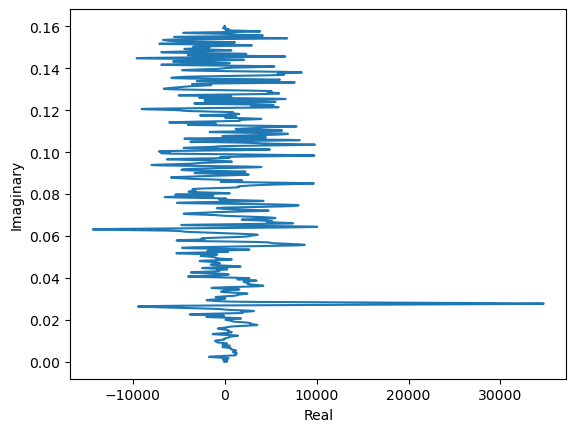

In [76]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
  
# create data of complex numbers using numpy
data = np.arange(8) + 1j*np.arange(-4, 4)
  
# extract real part using numpy
x = real
# extract imaginary part using numpy
y = imag
  
# plot the complex numbers
plt.plot(complex, times)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [43]:
import segyio

In [44]:
def create_segy(path, spec):
    with segyio.create(path, spec) as f1:
        pass
    
def create_spec():
    pass

In [45]:
spec = segyio.spec()

In [17]:
spec.ext_headers

0

In [46]:
complex = np.array(real) + np.array(imag)

In [47]:
complex_2D = complex.reshape((1,len(complex)))

In [26]:
complex_2D[0,:]

array([nan, nan, nan, ..., nan, nan, nan])

In [48]:
noScans=1956 
startTimeRel2TRG=0.014090 
scanInterval=8.192021e-005

In [28]:
scanInterval*1000

0.08192021000000001

In [49]:
filepath_segy = r'D:\InspectingP70Data\P70_data\SEB\PS3SLF_2021-09-17T110351Z_00047728.sgy'

segyio.tools.from_array2D(filename=filepath_segy, data=complex_2D, dt=0.125)

c:\prog\anaconda3\envs\venv_id1054\lib\site-packages\segyio\utils.py:23: RuntimeWarning: Implicit conversion from int32 to float32 (narrowing)
  warnings.warn(msg.format(x.dtype, dtype), RuntimeWarning)
